<a href="https://colab.research.google.com/github/Minsung-commit/TIL/blob/master/Instagram_LDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필수 모듈 호출
import pandas as pd
import numpy as np
import re

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
! pip install tomotopy #호출
import tomotopy as tp
!pip install kiwipiepy # 한국어 형태소 분석기
from kiwipiepy import Kiwi
kiwi = Kiwi()

     |████████████████████████████████| 16.3 MB 123 kB/s 
     |████████████████████████████████| 495 kB 2.1 MB/s 
     |████████████████████████████████| 25.7 MB 64 kB/s 
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.10.0-py3-none-any.whl size=25882656 sha256=7f35d37814c75e131904fd799b92e98ebfe79d203e1d3371848257045731255d
  Stored in directory: /root/.cache/pip/wheels/42/2f/c9/c82156eb15ed5ebb5475002723d1ab319947aca25bd663cd1d
Successfully built kiwipiepy-model


In [4]:
# 데이터 로드

insta_data = pd.read_csv('tot_dataset.csv')

#전처리 함수 정의 및 불용어 리스트 생성

In [5]:
stop_words = '의 가 이 은 들 ㅁ ㅂ 는 좀 잘 속초 걍 년대 ᆷ 과 했 거 해서 게 찍 느낌 많이 듯 뷰 박 링크 인스타그램 할인 성수기 홈페이지 주말 블로그 인원 추가 ㅎㅎ 너무 게스트 넘 하우스 드리다 이용 위치 쓰다 진짜 넘 찍 거 먹 ㅠㅠ ㅎㅎㅎ ㅠ 물 였 ㅠㅠㅠ ㅠㅠ ㅠ ㅋㅋㅋ ㅋㅋ ㅋ ㅎㅎㅎ ㅎㅎ ㅎ 화장실 도 뭐 오픈 최대 준비 룸 빵 거 많이 방법 달리 스럽다 특별자치도 를 에어비 으로 자 에 와 한 하다 아 휴 아이구 포스팅 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기 부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다 반드시 할줄알다 할수있다 할수있어 임에 틀림없다 한다면 등 등등 제 겨우 단지 다만 할뿐 딩동 댕그 대해서 대하여 대하면 훨씬 얼마나 얼마만큼 얼마큼 남짓 이제 분 도움 여 ㅁ ㅎ ㄶ 얼마간 둥 오랜만 약간 체크 체크아웃 가격 정보 비 수기 평일 기준 약 전국  예약 되어다 스마트 빔 블루투스 스피커 이 외 드라이어 다리미 구비 되어다 있다 주방 음식 조리 가능하다 환기 제한 전남 제부도 있다 냄새 나 요리 삼가다 경주시 부탁드리다 후 번길 문의 다 가격 수기 비성수기 주소  좀 조금 다수 몇 얼마 지만 하물며 또한 그러나 그렇지만 하지만 이외에도 대해 말하자면 뿐이다 다음에 반대로 반대로 말하자면 이와 반대로 바꾸어서 말하면 바꾸어서 한다면 만약 그렇지않으면 까악 툭 딱 삐걱거리다 보드득 비걱거리다 꽈당 응당 해야한다 에 가서 각 각각 여러분 각종 각자 제각기 하도록하다 와 과 그러므로 그래서 고로 한 까닭에 하기 때문에 거니와 이지만 대하여 관하여 관한 과연 실로 아니나다를가 생각한대로 진짜로 한적이있다 하곤하였다 하 하하 허허 아하 거바 와 오 왜 어째서 무엇때문에 어찌 하겠는가 무슨 어디 어느곳 더군다나 하물며 더욱이는 어느때 언제 야 이봐 어이 여보시오 흐흐 흥 휴 헉헉 헐떡헐떡 영차 여차 어기여차 끙끙 아야 앗 아야 콸콸 졸졸 좍좍 뚝뚝 주룩주룩 솨 우르르 그래도 또 그리고 바꾸어말하면 바꾸어말하자면 혹은 혹시 답다 및 그에 따르는 때가 되어 즉 지든지 설령 가령 하더라도 할지라도 일지라도 지든지 몇 거의 하마터면 인젠 이젠 된바에야 된이상 만큼 어찌됏든 그위에 게다가 점에서 보아 비추어 보아 고려하면 하게될것이다 일것이다 비교적 좀 보다더 비하면 시키다 하게하다 할만하다 의해서 연이서 이어서 잇따라 포항 우도 양양 전주시 통영 제천 여수시 순천 고성 합천 한림읍 전주 경북 구좌읍 돌산읍 태안 하동 포항시 제주시 밀양 양평 울산 무무 뒤따라 뒤이어 결국 의지하여 기대여 통하여 자마자 더욱더 불구하고 얼마든지 마음대로 주저하지 않고 곧 즉시 바로 당장 하자마자 밖에 안된다 하면된다 그래 그렇지 요컨대 다시 말하자면 바꿔 춘천 층 남해 스테이 서울 여수 거제 추천 경주 곳 객실 이다 강원도 강원 홍천 부산 영도 호 객실 교동 풀빌라 빌라 풀 스튜디오 펜션 말하면 즉 구체적으로 말하자면 시작하여 시초에 이상 허 헉 허걱 바와같이 해도좋다 해도된다 게다가 더구나 하물며 와르르 팍 퍽 펄렁 동안 이래 하고있었다 이었다 에서 로부터 까지 예하면 했어요 해요 함께 같이 더불어 마저 마저도 양자 모두 습니다 가까스로 하려고하다 즈음하여 다른 다른 방면으로 해봐요 습니까 했어요 말할것도 없고 무릎쓰고 개의치않고 하는것만 못하다 하는것이 낫다 매 매번 들 모 어느것 어느 로써 갖고말하자면 어디 어느쪽 어느것 어느해 어느 년도 라 해도 언젠가 어떤것 어느것 저기 저쪽 저것 그때 그럼 그러면 요만한걸 그래 그때 저것만큼 그저 이르기까지 할 줄 안다 할 힘이 있다 너 너희 당신 어찌 설마 차라리 할지언정 할지라도 할망정 할지언정 구토하다 게우다 토하다 메쓰겁다 옆사람 퉤 쳇 의거하여 근거하여 의해 따라 힘입어 그 다음 버금 두번째로 기타 첫번째로 나머지는 그중에서 견지에서 형식으로 쓰여 입장에서 위해서 단지 의해되다 하도록시키다 뿐만아니라 반대로 전후 전자 앞의것 잠시 잠깐 하면서 그렇지만 다음에 그러한즉 그런즉 남들 아무거나 어찌하든지 같다 비슷하다 예컨대 이럴정도로 어떻게 만약 만일 위에서 서술한바와같이 인 듯하다 하지 않는다면 만약에 무엇 무슨 어느 어떤 아래윗 조차 한데 그럼에도 불구하고 여전히 심지어 까지도 조차도 하지 않도록 않기 위하여 때 시각 무렵 시간 동안 어때 어떠한 하여금 네 예 우선 누구 누가 알겠는가 아무도 줄은모른다 줄은 몰랏다 하는 김에 겸사겸사 하는바 그런 까닭에 한 이유는 그러니 그러니까 때문에 그 너희 그들 너희들 타인 것 것들 너 위하여 공동으로 동시에 하기 위하여 어찌하여 무엇때문에 붕붕 윙윙 나 우리 엉엉 휘익 윙윙 오호 아하 어쨋든 만 못하다 하기보다는 차라리 하는 편이 낫다 흐흐 놀라다 상대적으로 말하자면 마치 아니라면 쉿 그렇지 않으면 그렇지 않다면 안 그러면 아니었다면 하든지 아니면 이라면 좋아 알았어 하는것도 그만이다 어쩔수 없다 하나 일 일반적으로 일단 한켠으로는 오자마자 이렇게되면 이와같다면 전부 한마디 한항목 근거로 하기에 아울러 하지 않도록 않기 위해서 이르기까지 이 되다 로 인하여 까닭으로 이유만으로 이로 인하여 그래서 이 때문에 그러므로 그런 까닭에 알 수 있다 결론을 낼 수 있다 으로 인하여 있다 어떤것 관계가 있다 관련이 있다 연관되다 어떤것들 에 대해 이리하여 그리하여 여부 하기보다는 하느니 하면 할수록 운운 이러이러하다 하구나 하도다 다시말하면 다음으로 에 있다 에 달려 있다 우리 우리들 오히려 하기는한데 어떻게 어떻해 어찌됏어 어때 어째서 본대로 자 이 이쪽 여기 이것 이번 이렇게말하자면 이런 이러한 이와 같은 요만큼 요만한 것 얼마 안 되는 것 이만큼 이 정도의 이렇게 많은 것 이와 같다 이때 이렇구나 것과 같이 끼익 삐걱 따위 와 같은 사람들 부류의 사람들 왜냐하면 중의하나 오직 오로지 에 한하다 하기만 하면 도착하다 까지 미치다 도달하다 정도에 이르다 할 지경이다 결과에 이르다 관해서는 여러분 하고 있다 한 후 혼자 자기 자기집 자신 우에 종합한것과같이 총적으로 보면 총적으로 말하면 총적으로 대로 하다 으로서 참 그만이다 할 따름이다 쿵 탕탕 쾅쾅 둥둥 봐 봐라 아이야 아니 와아 응 아이 참나 년 월 일 령 영 일 이 삼 사 오 육 륙 칠 팔 구 이천육 이천칠 이천팔 이천구 하나 둘 셋 넷 다섯 여섯 일곱 여덟 아홉 령 영 이 있 하 것 들 그 되 수 이 보 않 없 나 사람 주 아니 등 같 우리 때 년 가 한 지 대하 오 말 일 그렇 위하 때문 그것 두 말하 알 그러나 받 못하 일 그런 또 문제 더 사회 많 그리고 좋 크 따르 중 나오 가지 씨 시키 만들 지금 생각하 그러 속 하나 집 살 모르 적 월 데 자신 안 어떤 내 내 경우 감성 숙소 호텔 제주 제주도 강원도 강릉 속초 속초시 에어비앤비 명 생각 시간 그녀 수 약 다시 이런 앞 보이 번 나 다른 어떻 여자 개 전 들 사실 이렇 점 싶 말 정도 좀 원 잘 통하 놓 사실 이렇 점 싶 말 정도 좀 원 잘 통하 ㅆ 재 채 독 롭 도란도 팅 감성비앤비 공간 참여 이벤트 당첨자 기간 부산 #부산숙소 #부산에어비앤비 #부산여행 경기 경주시 있는 한 #경주숙소 강원도 제주 제주시 #제주숙소 #제주감성숙소 #제주숙소추천 남해군 서면 춘천시 남해 광안리 편 반 안면도 산방산 님 사장 정말 날 꼭 찾다 직접 날 그냥 맘 근데 스타 욕 편 째 첫 맛 채 황리단 황리단길 미리 열다 거제도 공간 광안리 광안대교 스다 해운대 헤이 윤슬 울릉도 손 옆 홍보 입실시간 에디터' #불용어 리스트 형성

In [6]:
stop_words=stop_words.split(' ')

In [7]:
stop_location = pd.read_csv('location_words.csv')
stop_location.columns = ['index', 'location']
stop_location = stop_location.location.tolist()

In [8]:
stop = stop_words + stop_location
stop = pd.Series(stop)
stopwords = stop.unique().tolist()

In [9]:
def tokenize(sent):
    res, score = kiwi.analyze(sent)[0] # 첫번째 결과를 사용
    return [word + ('다' if tag.startswith('V') else '') # 동사에는 '다'를 붙여줌
            for word, tag, _, _ in res
            if not tag.startswith('E') and not tag.startswith('J') and not tag.startswith('S') and not tag.startswith('W') and word not in stopwords] # 조사, 어미, 특수기호 및 stopwords에 포함된 단어는 제거

In [10]:
#"""한글빼고 전부 제거"""
def sub_special(s):
  rs = re.sub(r'[^가-힣]',' ',s)
  rr = re.sub(' +', ' ', rs)
  return rr

In [11]:
#"""한글빼고 전부 제거"""
def sub_special_token(s):
  rs = re.sub(r'[^가-힣]',' ',s).strip().split()
  return rs

In [12]:
def word_cleansing(data): 
  for i in range(len(data)): #불용어 제거
    result = []
    for w in data.content[i]:
      if w not in stopwords:
        result.append(w)
    data.content[i] = result

## 인스타그램 데이터 전처리

In [13]:
# 데이터 확인
insta_data

,Unnamed: 0,content,date,like,tags,name,overlap,place
0,0,"속초_파도의무늬오션뷰 감성 에어비앤비""파도의무늬""'파도의무늬'는물결이 일렁이고 윤슬...",2021-09-06,39,"['#데일리감성속초로', '#데일리감성_속초강원도', '#데일리감성_강원——————...",파도의무늬,1,NaN
1,1,"강릉_스테이 시호일시간의 흔적을 담은 감성숙소""스테이 시호일""'스테이 시호일'은60...",2021-09-03,12,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",스테이 시호일,1,NaN
2,2,"제주_까만돌멩이구좌읍 조식주는 예쁜 숙소""까만돌멩이""'까만돌멩이'는가족 및 커플 또...",2021-09-03,33,"['#데일리감성제주도', '#데일리감성_제주—————————————————']",까만돌멩이,1,제주특별자치도 제주시 구좌읍 계룡길 32
3,3,"단양_권장사양인스타감성 가득한 독채 숙소""권장사양""'권장사양'은 자연경관으로 둘러쌓...",2021-09-02,36,"['#데일리감성단양으로', '#데일리감성_단양충청북도', '#데일리감성_충북————...",권장사양,1,NaN
4,4,"강릉_라온가따뜻한 느낌의 힐링 감성숙소""라온가""'라온가'는 주택을 개조한 숙소이며'...",2021-09-01,24,"['#데일리감성강릉으로', '#데일리감성_강릉강원도', '#데일리감성_강원—————...",라온가,1,NaN
...,...,...,...,...,...,...,...,...
604,604,".한 폭의 그림같은 오션뷰, ""제주_Salt”🌊✨액자 창문 너머로 보이는 바다만 보...",2021-06-24,142,"['#제주', '#솔트', '#제주숙소', '#제주여행', '#제주숙소추천', '#...",솔트,2,NaN
605,605,".통창 리버뷰가 환상적인 ""춘천_피그멜리온이펙트""리버+마운틴뷰를 보며 월풀스파를 즐...",2021-06-15,87,"['#춘천', '#피그멜리온이펙트', '#춘천숙소', '#춘천여행', '#춘천숙소추...",피그멜리온이펙트,2,강원도 춘천시 서면 경춘로 405
606,606,"작은 시골 동네 안에 위치한 오붓&편안한 감성숙소,곡성_품안의밤!🧡논밭뷰를 보며 여...",2021-04-21,68,"['#곡성', '#품안의밤', '#곡성숙소', '#곡성여행', '#곡성숙소추천', ...",품안의밤,2,NaN
607,607,"KBS2에서 방송됐던 ""한 번 다녀왔습니다""의 웨딩촬영지로 유명한 강릉_더브리앙뜨!...",2021-04-19,57,"['#강릉', '#더브리앙뜨', '#강릉숙소', '#강릉여행', '#강릉데이트', ...",더브리앙뜨,2,강원도 강릉시 사천면 중앙서로 92-43


In [14]:
# 1차 클린징(영어, 특수문자, 숫자제거)
for i in range(len(insta_data.content)):
  insta_data.content[i] = sub_special(insta_data.content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# 토큰화
for i in range(len(insta_data.content)):
  insta_data.content[i]= tokenize(insta_data.content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [16]:
# 2차 클린징(불용어 처리)
word_cleansing(insta_data)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
insta_data.content

0      [파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...
1      [시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...
2      [까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...
3      [권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...
4      [라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...
                             ...                        
604    [폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...
605    [리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...
606    [시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...
607    [다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...
608    [고풍스, 런, 미칀, 한옥뷰, 한라궁, 아침, 눈, 뜨다, 한옥정원뷰, 제주오션뷰...
Name: content, Length: 609, dtype: object

In [18]:
i_content = pd.DataFrame(insta_data.content.copy())

In [19]:
i_data = pd.DataFrame(insta_data[['Unnamed: 0', 'content', 'name']].copy())

In [20]:
i_data.columns = ['item_idx', 'content','name']

In [21]:
i_data

,item_idx,content,name
0,0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",파도의무늬
1,1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",스테이 시호일
2,2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",까만돌멩이
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",권장사양
4,4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",라온가
...,...,...,...
604,604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",솔트
605,605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",피그멜리온이펙트
606,606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",품안의밤
607,607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",더브리앙뜨


In [22]:
drop = [index for index in range(len(i_data)) if len(i_data.content[index]) < 1] #빈 샘플 제거

In [23]:
drop

[149]

In [24]:
# 빈 샘플 제거
for i in drop:
  i_data.drop(i_data.index[i], inplace=True)

In [25]:
i_data.reset_index(drop=True, inplace=True)

In [26]:
i_data

,item_idx,content,name
0,0,"[파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...",파도의무늬
1,1,"[시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...",스테이 시호일
2,2,"[까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...",까만돌멩이
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",권장사양
4,4,"[라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...",라온가
...,...,...,...
603,604,"[폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...",솔트
604,605,"[리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...",피그멜리온이펙트
605,606,"[시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...",품안의밤
606,607,"[다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...",더브리앙뜨


#토큰화

In [ ]:
hannanum = Hannanum()
okt = Okt()

##불용어제거

In [ ]:
result = [] #불용어제거
for w in token_okt: 
    if w not in stop_words: 
        result.append(w)

# print(text_okt,'\n')
print(result)

['속초', '파도', '무늬', '오션', '뷰', '감성', '에어비앤비', '파도', '무늬', '파도', '무늬', '늘다', '물결', '일렁', '윤슬', '반짝거리다', '파도', '철썩', '철썩', '치다', '다양하다', '모습', '파도', '무늬', '즐기다', '들려오다', '시원하다', '파도', '소리', '눈', '감고', '듣다', '보다', '많다', '많다', '계획', '내다', '두다', '느긋하다', '머리', '식히다', '숙소', '내부', '세', '창', '푸른', '파도', '무늬', '오후', '저녁', '기다', '들어오다', '따뜻하다', '호의', '햇살', '그대로', '담다', '공간', '바다', '보이다', '오션', '뷰', '객실', '욕실', '분리', '눈', '감고', '파도', '소리', '들다', '안티', '스트레스', '티', '복잡하다', '마음', '해소', '해보다', '속초', '파도', '무늬', '강원도', '속초시', '정확하다', '표시', '감성', '숙소', '떠나다', '여행']


## 불용어+토큰화 컬럼 생성

In [ ]:
data['token_content'] = np.NaN

In [ ]:
for i in range(len(data.content)):
  data.content[i] = tokenize(data.content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
for i in range(len(data.content)):
  result = []
  for w in data.content[i]:
    if w not in stop_words:
      result.append(w)
    data.token_content[i] = result

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
data.loc[data.name == '평일']

,name,content,token_content
154,평일,"[평일, 호, 비, 수기, 기준]",[호]


In [ ]:
data['token_nolist'] = np.NaN

In [ ]:
for i in range(len(data)):
  data.token_nolist[i] = " ".join(data.token_content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
" ".join(data.token_content[0])

'속초 파도 무늬 오션 뷰 감성 에어비앤비 파도 무늬 파도 무늬 늘다 물결 일렁 윤슬 반짝거리다 파도 철썩 철썩 치다 다양하다 모습 파도 무늬 즐기다 들려오다 시원하다 파도 소리 눈 감고 듣다 보다 많다 많다 계획 내다 두다 느긋하다 머리 식히다 숙소 내부 세 창 푸른 파도 무늬 오후 저녁 기다 들어오다 따뜻하다 호의 햇살 그대로 담다 공간 바다 보이다 오션 뷰 객실 욕실 분리 눈 감고 파도 소리 들다 안티 스트레스 티 복잡하다 마음 해소 해보다 속초 파도 무늬 강원도 속초시 정확하다 표시 감성 숙소 떠나다 여행'

#TF-IDF 벡터화

In [148]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [149]:
i_data['token_nolist'] = np.NaN

In [150]:
for i in range(len(i_data)):
  i_data.token_nolist[i] = " ".join(i_data.content[i])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [151]:
test = i_data.token_nolist

In [152]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(test)
# 줄거리에 대해서 tf-idf 수행
print(tfidf_matrix.shape)

(608, 5472)


## 코사인 유사도 행렬 생성

In [153]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [154]:
cosine_sim

array([[1.        , 0.06390744, 0.04552896, ..., 0.01356007, 0.00410948,
        0.02198898],
       [0.06390744, 1.        , 0.04917277, ..., 0.07454092, 0.01117045,
        0.01964605],
       [0.04552896, 0.04917277, 1.        , ..., 0.01363698, 0.00863056,
        0.00504042],
       ...,
       [0.01356007, 0.07454092, 0.01363698, ..., 1.        , 0.08985219,
        0.09231173],
       [0.00410948, 0.01117045, 0.00863056, ..., 0.08985219, 1.        ,
        0.09831518],
       [0.02198898, 0.01964605, 0.00504042, ..., 0.09231173, 0.09831518,
        1.        ]])

In [56]:
##인덱스 테이블 만들기##
indices = pd.Series(i_data.index, index=i_data.name).drop_duplicates()
print(indices)

name
파도의무늬         0
스테이 시호일       1
까만돌멩이         2
권장사양          3
라온가           4
           ... 
솔트          603
피그멜리온이펙트    604
품안의밤        605
더브리앙뜨       606
한라궁호텔       607
Length: 608, dtype: int64


## 유사 아이템 검색

In [59]:
def insta_REC(name, cosine_sim=cosine_sim):
    #입력한 숙소로부터 인덱스 가져오기
    idx = indices[name]

    # 모든 숙소에 대해서 해당 숙소와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 숙소들을 정렬
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True)

    # 가장 유사한 10개의 숙소를 받아옴
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개 숙소의 인덱스 받아옴
    insta_indices = [i[0] for i in sim_scores]
    
    #기존에 읽어들인 데이터에서 해당 인덱스의 값들을 가져온다. 그리고 스코어 열을 추가하여 코사인 유사도도 확인할 수 있게 한다.
    result_data = i_data.iloc[insta_indices].copy()
    result_data['score'] = [i[1] for i in sim_scores]
    
    # 읽어들인 데이터에서 줄거리 부분만 제거, 제목과 스코어만 보이게 함
    del result_data['content']

    # 가장 유사한 10개의 숙소의 제목을 리턴
    return result_data

In [62]:
insta_REC('월림차경')

,item_idx,name,token_nolist,score
17,17,제주 월림차경,ᆷ 차경 자쿠지 민박 ᆷ 차경 머물다 예쁘다 가득 담다 흐름 거스르다 인생 쉼표 공...,0.471562
393,394,제주가옥,동쪽 조용 바닷가 마을 자쿠지 돌 독채 고즈넉 느끼다 전통 돌 탄생 제주스러움 가득...,0.231919
431,432,둘하루방,둘하루방 동쪽 자쿠지 따뜻 하루 하루 머물다 뜻 스럽 온전 히 느끼다 센스 돋보이다...,0.217186
389,390,하월,자쿠지 매력 독채 노을 달빛 뜻 아름답다 멈추다 심신 느끼다 팀 사용 넓다 독채숙소...,0.194454
440,441,너울민박,너울민박 조용 마을 신상독채 울다 민박 고유 멋 살리다 현대 디자인 요소 인테리어 ...,0.187760
424,425,서림연가,연가 아름답다 독채 서림연 서림연 한국 건축 우수상 한국 건축사 독립 자리 잡다 중...,0.144627
256,257,스테이한량,프다 프라이빗 한량 감각 인테리어 모던 한옥 적당히 섞이다 조명 우드 인테리어 취향...,0.124729
397,398,온화한가,온화 조용 독채풀빌라 온화 온화 푸릇푸릇 즐기다 신상숙 총 운영 가득 연인 세련 느...,0.116035
66,66,에디토리얼제주,에디토리얼제주 제주다움 오롯 느끼다 독채스테 에디토리얼제 에디토리얼제 독채 거실 키...,0.107654
573,574,달리야드,아름 정원 야드 다녀오다 아름답다 정원 정원 더욱 느끼다 전반 어둡다 계열 꾸미다 ...,0.105509


# 클러스터링

In [ ]:
data

,name,content,token_content,token_nolist
0,파도의무늬,"[속초, 파도, 무늬, 오션, 뷰, 감성, 에어비앤비, 파도, 무늬, 파도, 무늬,...","[속초, 파도, 무늬, 오션, 뷰, 감성, 에어비앤비, 파도, 무늬, 파도, 무늬,...",속초 파도 무늬 오션 뷰 감성 에어비앤비 파도 무늬 파도 무늬 늘다 물결 일렁 윤슬...
1,스테이 시호일,"[강릉, 스테이, 호일, 시간, 흔적, 담다, 감성, 숙소, 스테이, 호일, 스테이...","[강릉, 스테이, 호일, 흔적, 담다, 감성, 숙소, 스테이, 호일, 스테이, 호일...",강릉 스테이 호일 흔적 담다 감성 숙소 스테이 호일 스테이 호일 강릉 번화가 유명하...
2,까만돌멩이,"[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...","[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...",제주 까맣다 돌멩이 구좌읍 식주 예쁘다 숙소 까맣다 돌멩이 까맣다 돌멩이 는가 족 ...
3,권장사양,"[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...","[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...",단양 권장 사양 인스타 감성 가득하다 독채 숙소 권장 사양 권장 사양 자연 경관 둘...
4,라온가,"[강릉, 온, 따뜻하다, 느낌, 힐링, 감성, 숙소, 라오, 라오, 늘다, 주택, ...","[강릉, 온, 따뜻하다, 느낌, 힐링, 감성, 숙소, 라오, 라오, 늘다, 주택, ...",강릉 온 따뜻하다 느낌 힐링 감성 숙소 라오 라오 늘다 주택 개조 숙소 온 순 우리...
...,...,...,...,...
604,솔트,"[하다, 폭, 그림, 같다, 오션, 뷰, 제주, 액자, 창문, 너머, 보이다, 바다...","[폭, 그림, 오션, 뷰, 제주, 액자, 창문, 너머, 보이다, 바다, 보고, 가다...",폭 그림 오션 뷰 제주 액자 창문 너머 보이다 바다 보고 가다 모르다 감성 숙소 랍...
605,피그멜리온이펙트,"[통창, 리버, 뷰, 환상, 춘천, 피그, 메다, 온, 펙트, 리버, 마운틴뷰, 보...","[통창, 리버, 뷰, 환상, 춘천, 피그, 메다, 온, 펙트, 리버, 마운틴뷰, 보...",통창 리버 뷰 환상 춘천 피그 메다 온 펙트 리버 마운틴뷰 보다 월풀 스파 즐기다 ...
606,품안의밤,"[작다, 시골, 동네, 안, 위치, 붓, 편안하다, 감성, 숙소, 곡성, 품다, 밤...","[작다, 시골, 동네, 위치, 붓, 편안하다, 감성, 숙소, 곡성, 품다, 밤, 논...",작다 시골 동네 위치 붓 편안하다 감성 숙소 곡성 품다 밤 논밭 뷰 보다 여유 만끽...
607,더브리앙뜨,"[방송, 돼다, 하다, 번, 다녀오다, 의, 웨딩촬영, 지로, 유명하다, 강릉, 더...","[방송, 돼다, 다녀오다, 웨딩촬영, 지로, 유명하다, 강릉, 브리앙, 뜨다, 화이...",방송 돼다 다녀오다 웨딩촬영 지로 유명하다 강릉 브리앙 뜨다 화이트 앤 우드 톤 좋...


# Word2Vec embedding

In [27]:
# Word2Vec embedding
from gensim.models import Word2Vec

In [ ]:
GPU = True
if GPU: # GPU
    import cupy as np
    np.cuda.set_allocator(np.cuda.MemoryPool().malloc)
    #np.add.at = np.scatter_add

    print('\033[92m' + '-' * 60 + '\033[0m')
    print(' ' * 23 + '\033[92mGPU Mode (cupy)\033[0m')
    print('\033[92m' + '-' * 60 + '\033[0m\n')
else :
    import numpy as np

------------------------------------------------------------
                       GPU Mode (cupy)
------------------------------------------------------------



In [28]:
i_data.content

0      [파도의무늬오션뷰, 무늬, 무늬, 물결, 일렁이다, 반짝거리다, 철썩, 철썩, 치다...
1      [시호일시간, 흔적, 담다, 시호, 시호, 번화가, 유명, 흔적, 품다, 주택, 상...
2      [까맣다, 돌멩이, 조식, 예쁘다, 까맣다, 돌멩이, 까맣다, 돌멩이, 가족, 커플...
3      [권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...
4      [라온가, 따뜻, 힐링, 라온, 온, 주택, 개조, 라온, 우리말, 즐겁다, 뜻, ...
                             ...                        
603    [폭, 그림, 오션뷰, 액자, 창문, 너머, 바다, 감성숙소랍니돠, 미니멀리즘, 추...
604    [리버뷰, 피그멜리온이펙, 트다, 리버, 마운틴뷰, 월풀스파, 즐기다, 뷰맛, 원룸...
605    [시골, 동네, 오붓, 편안, 밤, 논밭뷰, 여유, 만끽, 힐링, 게스트하우스, 사...
606    [다녀오다, 웨딩촬영지, 유명, 더브리앙, 뜨다, 화이트, 앤, 우드, 톤, 좋아하...
607    [고풍스, 런, 미칀, 한옥뷰, 한라궁, 아침, 눈, 뜨다, 한옥정원뷰, 제주오션뷰...
Name: content, Length: 608, dtype: object

In [42]:
embedding_model = Word2Vec(i_data.content, size=100, window = 2, min_count=3, workers=4, iter=100, sg=1)

In [44]:
embedding_model.wv

In [ ]:
# print(embedding_model.most_similar(positive=["제주"], topn=100))

### 문장 벡터

In [30]:
def get_sentence_mean_vector(morphs):
    vector = []
    for i in morphs:
        try:
            vector.append(embedding_model.wv[i])
        except KeyError as e:
            pass
    try:
        return sum(vector)/len(vector)
    except IndexError as e:
        pass

In [31]:
i_data['wv'] = i_data['content'].map(get_sentence_mean_vector)

In [32]:
i_data.wv

0      [0.11151155, -0.12891075, 0.37257895, -0.22781...
1      [0.14980392, -0.13009518, 0.25155604, -0.27787...
2      [0.28826913, -0.05063026, 0.25161028, -0.30363...
3      [0.23520215, -0.3606021, 0.40051273, -0.256816...
4      [0.19727871, -0.25329173, 0.1823526, -0.117029...
                             ...                        
603    [0.28320712, -0.2781702, 0.44422528, -0.360272...
604    [0.21453018, -0.31426734, 0.53430647, -0.19183...
605    [0.27332854, -0.22070935, 0.35798576, -0.24156...
606    [0.15714897, -0.24697466, 0.4164352, -0.281800...
607    [0.34792706, -0.15666175, 0.4475045, -0.362330...
Name: wv, Length: 608, dtype: object

## 코사인 유사도 행렬 생성

In [91]:
wv_matrix = np.asarray(i_data.wv)

In [125]:
from numpy import dot
from numpy.linalg import norm
import numpy as np
def cos_sim(A, B):
       return dot(A, B)/(norm(A)*norm(B))

In [111]:
wv_rematrix = wv_matrix.reshape(-1,608)
wv_rerematrix = wv_matrix.reshape(608,-1)

In [123]:
wv_matrix[607]

array([ 0.34792706, -0.15666175,  0.4475045 , -0.36233088,  0.16777454,
        0.08335192,  0.03360109,  0.08653297, -0.08039697,  0.05904553,
        0.17479694, -0.03196775, -0.26084748,  0.3895917 ,  0.19741757,
        0.22684646, -0.5278568 ,  0.10101597,  0.16405568, -0.12487886,
       -0.04885444, -0.23356773,  0.25822872, -0.33530357, -0.21033572,
        0.10565053, -0.08219618,  0.3806595 ,  0.19837536,  0.39082652,
       -0.00105334, -0.3155931 , -0.12864132,  0.18380997, -0.17726824,
       -0.07717571,  0.3243349 , -0.03966491,  0.4605437 ,  0.4079747 ,
       -0.38571078,  0.16908269,  0.10126678,  0.04440233, -0.0327527 ,
       -0.24514046, -0.05117604,  0.06177434,  0.03644312,  0.06389681,
        0.20028643,  0.10962331, -0.3504887 , -0.26575926, -0.06462549,
       -0.30860206,  0.15929958, -0.29292712, -0.24833442, -0.01109632,
       -0.1725658 , -0.22122659,  0.10048094,  0.0140403 ,  0.1427521 ,
        0.27488577, -0.14433244, -0.07148717,  0.379561  ,  0.29

In [106]:
np.shape(wv_matrix)

(608,)

In [107]:
np.shape(wv_rematrix)

(1, 608)

In [120]:
cos_sim = cos_sim(wv_matrix[0], wv_matrix[0])

In [128]:
rows = []
for x in range(608):
  cos_sim = dot(wv_matrix[0], wv_matrix[x])/(norm(wv_matrix[0])*norm(wv_matrix[x]))
  rows.append(cos_sim)

In [ ]:
rows

In [131]:
rows = []
matrix = []
for i in range(608):
  for x in range(608):
    cos_sim = dot(wv_matrix[i], wv_matrix[x])/(norm(wv_matrix[i])*norm(wv_matrix[x]))
    rows.append(cos_sim)
  matrix.append(rows)
  rows=[]

In [156]:
np.array(matrix)

array([[1.0000001 , 0.8436532 , 0.7400426 , ..., 0.77581924, 0.70262986,
        0.73069024],
       [0.8436532 , 1.        , 0.7928614 , ..., 0.8418745 , 0.75484407,
        0.7958902 ],
       [0.7400426 , 0.7928614 , 0.99999994, ..., 0.7784298 , 0.7543493 ,
        0.7697048 ],
       ...,
       [0.77581924, 0.8418745 , 0.7784298 , ..., 1.0000001 , 0.91296357,
        0.9175207 ],
       [0.70262986, 0.75484407, 0.7543493 , ..., 0.91296357, 1.0000001 ,
        0.9001342 ],
       [0.73069024, 0.7958902 , 0.7697048 , ..., 0.9175207 , 0.9001342 ,
        1.0000001 ]], dtype=float32)

In [133]:
##인덱스 테이블 만들기##
indices = pd.Series(i_data.index, index=i_data.name).drop_duplicates()
print(indices)

name
파도의무늬         0
스테이 시호일       1
까만돌멩이         2
권장사양          3
라온가           4
           ... 
솔트          603
피그멜리온이펙트    604
품안의밤        605
더브리앙뜨       606
한라궁호텔       607
Length: 608, dtype: int64


## 유사 아이템 검색

In [158]:
def insta_REC(name, cosine_sim=matrix):
    #입력한 숙소로부터 인덱스 가져오기
    idx = indices[name]

    # 모든 숙소에 대해서 해당 숙소와의 유사도를 구하기
    sim_scores = list(enumerate(cosine_sim[idx]))

    # 유사도에 따라 숙소들을 정렬
    sim_scores = sorted(sim_scores, key=lambda x:x[1], reverse = True)

    # 가장 유사한 10개의 숙소를 받아옴
    sim_scores = sim_scores[1:11]

    # 가장 유사한 10개 숙소의 인덱스 받아옴
    insta_indices = [i[0] for i in sim_scores]
    
    #기존에 읽어들인 데이터에서 해당 인덱스의 값들을 가져온다. 그리고 스코어 열을 추가하여 코사인 유사도도 확인할 수 있게 한다.
    result_data = i_data.iloc[insta_indices].copy()
    result_data['score'] = [i[1] for i in sim_scores]
    
    # 읽어들인 데이터에서 콘텐츠 부분만 제거, 제목과 스코어만 보이게 함
    # del result_data['content']
    del result_data['wv']
    del result_data['token_nolist']

    # 가장 유사한 10개의 숙소의 제목을 리턴
    return result_data

In [159]:
insta_REC('파도의무늬')

,item_idx,content,name,score
422,423,"[인더모은, 마운틴, 가득, 담다, 독채신, 모으다, 툇마루, 앉다, 계절, 색, ...",인더모은,0.863815
3,3,"[권장, 가득, 권장, 권장, 자연경관, 두르다, 쌓이다, 마당, 힐, 링, 판, ...",권장사양,0.860780
16,16,"[유포리나, 한옥, 시골, 동네, 좁다, 따라가다, 한옥, 건물, 마당, 넓다, 탁...",춘천 유포리 나의집,0.858357
39,39,"[온화, 여유, 휴식, 따뜻, 느끼다, 화가, 짓다, 재생, 옛, 특징, 서까래, ...",온화가,0.856545
44,44,"[플라쥬, 해운대구, 플라쥬, 화이트, 톤, 신축, 건물, 오롯, 팀, 머물다, 송...",플라쥬,0.856239
382,383,"[점숙씨영월, 핫, 점숙, 점숙, 빈티지, 가득, 품다, 시내, 떨어지다, 독립, ...",점숙씨,0.854950
29,29,"[의귀소담제, 조용, 마을, 귤, 밭, 펼쳐지다, 탕, 귀소, 담, 숲, 나무, 돌...",의귀소담,0.851714
26,26,"[온화, 소박, 따뜻, 휴식, 온화, 화가, 도시, 답답, 일상, 벗어나다, 가족,...",강릉 온화가,0.849934
30,30,"[키에튀드, 조용, 마을, 깊다, 숲, 힐링, 키에튀, 드, 마운틴, 펼쳐지다, 아...",키에튀드,0.849698
27,27,"[송당미학제주, 동쪽, 푸르다, 내려다보다, 고요히, 쉬다, 미학, 미학, 이루어지...",송당미학,0.848733


In [ ]:
embedding_model.wv

# K-Means 어휘 클러스터링

In [ ]:
from sklearn.cluster import KMeans

word_vectors = embedding_model.wv.syn0 # 어휘의 feature vector
num_clusters = int(word_vectors.shape[0]/50) # 어휘 크기의 1/5나 평균 5단어
print(num_clusters)
num_clusters = int(num_clusters)

24


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `syn0` (Attribute will be removed in 4.0.0, use self.wv.vectors instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
kmeans_clustering = KMeans(n_clusters=num_clusters)
idx = kmeans_clustering.fit_predict(word_vectors)

idx = list(idx)
names = embedding_model.wv.index2word
word_centroid_map = {names[i]: idx[i] for i in range(len(names))}

In [ ]:
for c in range(num_clusters):
    # 클러스터 번호를 출력
    print("\ncluster {}".format(c))
    
    words = []
    cluster_values = list(word_centroid_map.values())
    for i in range(len(cluster_values)):
        if (cluster_values[i] == c):
            words.append(list(word_centroid_map.keys())[i])            
    print(words)


cluster 0
['책', '읽다', '서재']

cluster 1
['층', '야외', '넓다', '침실', '거실', '마당', '작다', '방', '햇살', '창', '크다', '테라스', '통창', '다양하다', '구성', '욕조', '룸', '들어오다', '포근하다', '침대', '앉다', '실내', '복층', '창문', '그림', '전체', '마련', '자다', '밖', '탑', '루프', '구조', '욕실', '건물', '화장실', '프로젝터', '통', '영화', '통해', '포인트', '테이블', '열다', '나다', '높다', '욕', '프로젝트', '다락방', '유리', '채다', '문', '유리창', '외부', '크게', '향', '다이닝룸', '형태', '마루', '올라가다', '반기다', '계단', '낮다', '아담하다', '방이', '분리', '베드', '부엌', '서든', '옥상', '원룸', '따다', '하이라이트', '해먹', '겸', '의자', '연결', '채광', '다르다', '중정', '크기', '본채', '앞마당', '뒷마당', '식탁', '타고', '온실', '쇼파', '툇마루', '그네', '원형', '평상', '액자', '찍', '샤워', '족욕', '모양', '쪽', '메인', '온돌방', '대청', '벽난로', '바깥채', '컬러', '잡고', '개방', '방과', '구분', '용공', '각기', '잠들다']

cluster 2
['인테리어', '톤', '꾸미다', '화이트', '깔끔하다', '소품', '내부', '우드', '아기자기하다', '곳곳', '사장', '어우러지다', '취향', '감각', '모던', '조명', '해외', '외관', '빈티', '함', '돋보이다', '가구', '만들어지다', '놓이다', '개다', '미니', '호스트', '앤', '센스', '끄다', '조화롭다', '독특하다', '찍기', '색감', '멀다', '스타', '조합', '디자인', '즐겁다', '성', '부부', '깨끗하

- word2vec을 100차원으로 했기 때문에 시각화를 위해서 2차원으로 축소,
- 축소할 때 관계를 유지하기 위해 t-SNE로 transform

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import matplotlib

# path_gothic = "/home/ururu/fonts/NanumGothic.ttf"
# prop = fm.FontProperties(fname=path_gothic)
matplotlib.rcParams["axes.unicode_minus"] = False

In [ ]:
vocab = list(embedding_model.wv.vocab)
X = embedding_model[vocab]

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X) 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


In [ ]:
import pandas as pd

df = pd.DataFrame(X_tsne, index=vocab, columns=["x", "y"])

In [ ]:
df.head()

,x,y
속초,-12.338897,-7.666074
파도,35.930817,20.344057
오션,2.432848,-4.858544
뷰,8.164875,2.059552
감성,-7.441114,2.955127


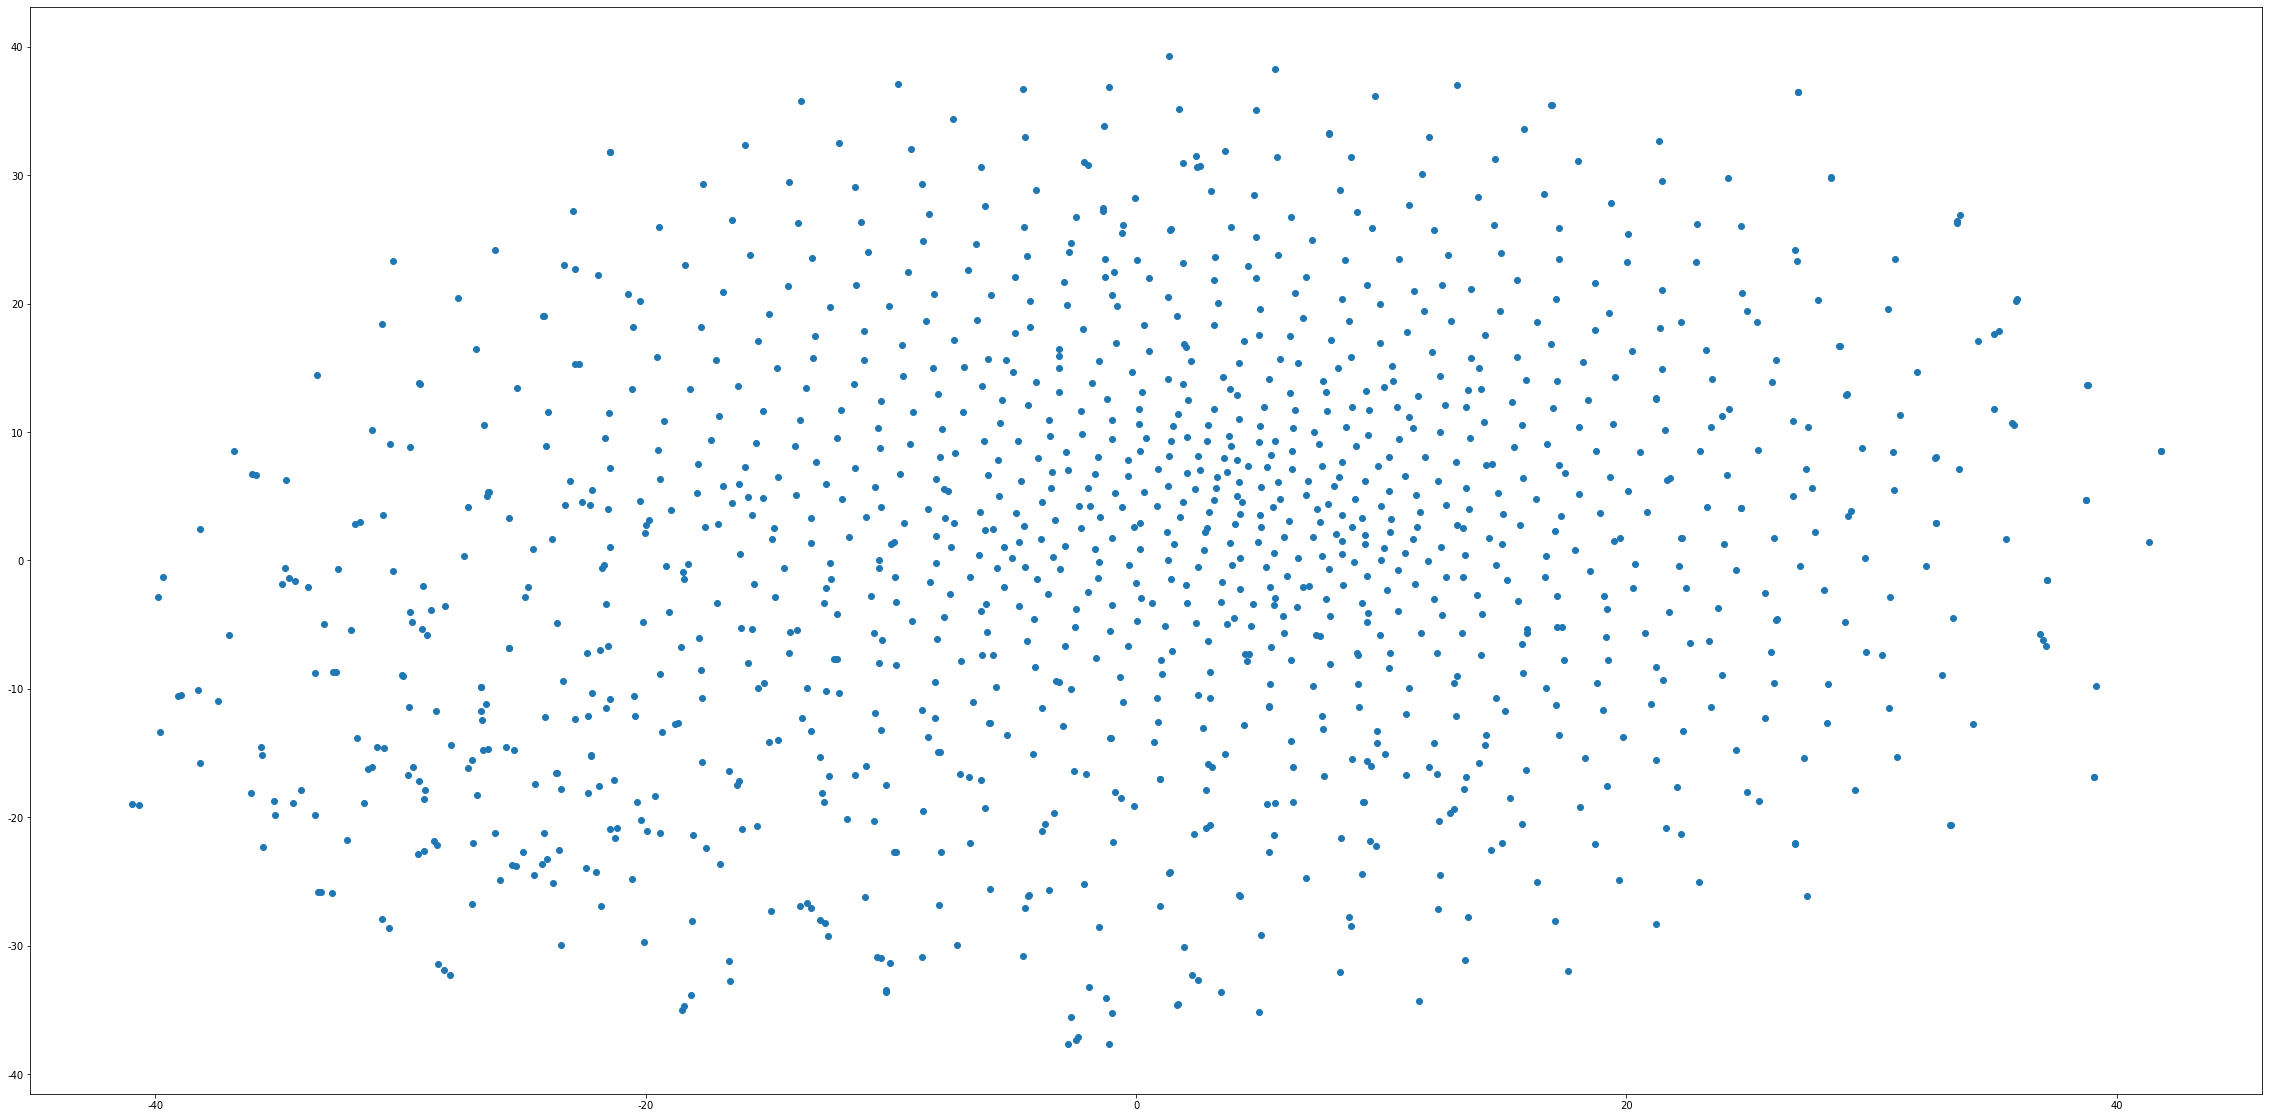

In [ ]:
%matplotlib inline

fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)
ax.scatter(df["x"], df["y"])

# for word, pos in list(df.iterrows()):
#     ax.annotate(word, pos, fontsize=12)
plt.show()

# 문장 클러스터링 - 어휘 벡터 평균 활용

In [ ]:
from sklearn.cluster import KMeans
import time

word_vectors = data['wv'].to_list() 
num_clusters = 10

# K means 를 정의하고 학습시킨다.
kmeans_clustering = KMeans( n_clusters = num_clusters )
idx = kmeans_clustering.fit_predict( word_vectors )
data['category'] = idx

In [ ]:
data.loc[data.category == 5]

,name,content,token_content,token_nolist,wv,category
2,까만돌멩이,"[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...","[제주, 까맣다, 돌멩이, 구좌읍, 식주, 예쁘다, 숙소, 까맣다, 돌멩이, 까맣다...",제주 까맣다 돌멩이 구좌읍 식주 예쁘다 숙소 까맣다 돌멩이 까맣다 돌멩이 는가 족 ...,"[0.16441333, 0.279764, -0.039880257, 0.1238291...",5
3,권장사양,"[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...","[단양, 권장, 사양, 인스타, 감성, 가득하다, 독채, 숙소, 권장, 사양, 권장...",단양 권장 사양 인스타 감성 가득하다 독채 숙소 권장 사양 권장 사양 자연 경관 둘...,"[0.31786126, 0.20670103, -0.11282189, 0.020639...",5
7,하도리보통날,"[제주, 하다, 보통, 날, 돌담, 예쁘다, 제주, 감성, 스테이, 하다, 보통, ...","[제주, 보통, 날, 돌담, 예쁘다, 제주, 감성, 스테이, 보통, 날, 보통, 날...",제주 보통 날 돌담 예쁘다 제주 감성 스테이 보통 날 보통 날 사장 여행 오다 특별...,"[0.07755961, 0.33260882, -0.02651524, 0.158076...",5
9,여전히제주,"[제주, 여전하다, 제주, 동쪽, 감성, 숙소, 여전하다, 제주, 여전하다, 제주,...","[제주, 여전하다, 제주, 동쪽, 감성, 숙소, 여전하다, 제주, 여전하다, 제주,...",제주 여전하다 제주 동쪽 감성 숙소 여전하다 제주 여전하다 제주 숙소 동 운영 프라...,"[0.13489503, 0.23852326, -0.031255767, 0.04636...",5
14,무무라,"[향기, 가득하다, 힐링, 공간, 무무, 물이, 졸졸, 흐르다, 바람, 솔솔, 불,...","[향기, 가득하다, 힐링, 공간, 무무, 물이, 흐르다, 바람, 솔솔, 불, 나뭇잎...",향기 가득하다 힐링 공간 무무 물이 흐르다 바람 솔솔 불 나뭇잎 하늘거리다 자연 향...,"[0.1280808, 0.29650572, -0.067073636, 0.056336...",5
...,...,...,...,...,...,...
530,헤이,"[순천역, 멀다, 않다, 위치, 조용하다, 롯, 우리, 즐기다, 있다, 독채, 감성...","[순천역, 멀다, 위치, 조용하다, 롯, 즐기다, 독채, 감성, 숙소, 헤이, 입구...",순천역 멀다 위치 조용하다 롯 즐기다 독채 감성 숙소 헤이 입구 모든 층 유럽 꾸미...,"[0.11975286, 0.30676645, -0.05414556, -0.07918...",5
568,제주,"[근처, 위치, 하다, 확, 트이다, 통창, 제주, 감성, 물씬, 느끼다, 있다, ...","[근처, 위치, 확, 트이다, 통창, 제주, 감성, 물씬, 느끼다, 돌담, 갈대, ...",근처 위치 확 트이다 통창 제주 감성 물씬 느끼다 돌담 갈대 풍력 발전기 바다 보이...,"[0.09848593, 0.24425817, -0.0044043474, -0.049...",5
572,멜로우멘션,"[강화도, 감성, 숙소, 인천, 강화군, 내가면, 비고, 보다, 예약, 및, 가격,...","[강화도, 감성, 숙소, 인천, 강화군, 내가면, 비고, 보다, 채팅, 문의, 님,...",강화도 감성 숙소 인천 강화군 내가면 비고 보다 채팅 문의 님 강화도 새롭다 오픈 ...,"[0.14178216, 0.20464696, -0.094297744, 0.06125...",5
574,달리야드,"[제주, 달리, 아름답다, 정원, 제주, 서귀포시, 성산읍, 달리, 박, 인기, 준...","[제주, 아름답다, 정원, 제주, 서귀포시, 성산읍, 박, 인기, 준, 위치, 아름...",제주 아름답다 정원 제주 서귀포시 성산읍 박 인기 준 위치 아름답다 정원 제주 감성...,"[0.050711907, 0.28663054, -0.025317093, 0.0742...",5


In [ ]:
from sklearn.manifold import TSNE

X = data['wv'].to_list()
y = data['category'].to_list()

import os.path
import pickle

tsne_filepath = 'tsne3000.pkl'

# File Cache
if not os.path.exists(tsne_filepath):
    tsne = TSNE(random_state=42)
    tsne_points = tsne.fit_transform(X)
    with open(tsne_filepath, 'wb+') as f:
        pickle.dump(tsne_points, f)
else: # Cache Hits!
    with open(tsne_filepath, 'rb') as f:
        tsne_points = pickle.load(f)

tsne_df = pd.DataFrame(tsne_points, index=range(len(X)), columns=['x_coord', 'y_coord'])
tsne_df['item_name'] = data['name'].to_list()
tsne_df['item_content'] = data['token_content'].to_list()
tsne_df['cluster_no'] = y

In [ ]:
tsne_df.sample(3)

,x_coord,y_coord,item_name,item_content,cluster_no
50,17.492620,1.541114,달하우스,"[밀양, 위치, 조용하다, 시골, 마을, 내려다보다, 달하우스, 달하우스, 늘다, ...",3
223,-10.696076,-5.085169,안녕김녕,"[제주, 김녕, 오션, 뷰, 숙소, 제주, 구좌읍, 좌, 해안로, 박, 하루, 종일...",2
173,-0.042807,2.565305,헤이춘천,"[춘천, 곳, 숙박, 플랫폼, 선두, 주자, 놀다, 신규, 라이프스타일, 브랜드, ...",1


##Bokeh로 2차원 Plotting

In [ ]:
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool, ColumnDataSource, value
from bokeh.palettes import brewer

output_notebook()

- 10개의 클러스터에 컬러 생성

In [ ]:
# Get the number of colors we'll need for the plot.
colors = brewer["Spectral"][len(tsne_df['cluster_no'].unique())]

# Create a map between factor and color.
colormap = {i: colors[i] for i in tsne_df['cluster_no'].unique()}

# Create a list of colors for each value that we will be looking at.
colors = [colormap[x] for x in tsne_df['cluster_no']]

tsne_df['color'] = colors

- 이후 Bokeh가 인식하는 DataSource 객체를 만들어준다.


In [ ]:
# Bokeh Datasouce 만들기
plot_data = ColumnDataSource(
    data=tsne_df.to_dict(orient='list')
)


- 그리고 실제 Plot을 그리기 위한 배경으로 650x650 사이즈의 공간을 만들어준다.

In [ ]:
# Plot 만들기(배경)
tsne_plot = figure(
    title='TSNE item_content Embeddings',
    plot_width = 650,
    plot_height = 650,
    active_scroll='wheel_zoom',
    output_backend="webgl",
)

- 툴팁 생성

In [ ]:
# 해당 Hover 툴팁 만들기
tsne_plot.add_tools(
    HoverTool(
        tooltips='@item_name' + '@cluster_no'
    )
)

- 데이터 입력

In [ ]:
tsne_plot.circle(
    source=plot_data,
    x='x_coord',
    y='y_coord',
    line_alpha=0.3, 
    fill_alpha=0.2,
    size=10,
    fill_color='color',
    line_color='color',
)

GlyphRenderer(id='1041', ...)

In [ ]:
# 각 값들 추가해주기 
tsne_plot.title.text_font_size = '12pt'
tsne_plot.xaxis.visible = False
tsne_plot.yaxis.visible = False
tsne_plot.grid.grid_line_color = None
tsne_plot.outline_line_color = None

# 짠!
show(tsne_plot)

### 클러스터별 정보 보기

In [ ]:
data[
     data['category'] == 0
][['name','token_content', 'category']].head(10)

,name,token_content,category
8,스테이와봄,"[양양, 스테이, 봄, 양양, 프라이, 빗, 감성, 숙소, 스테이, 봄, 스테이, ...",0
88,팔로우,"[많다, 관심, 덕분, 기념, 돌아오다, 감성, 비앤비, 이벤, 트이다, 진심, 감...",0
200,더무빙,"[부산, 기장, 캠핑, 카라반, 더무빙, 포토, 존, 많다, 캠핑, 연인, 친구, ...",0
256,해와달글램핑,"[물, 위, 바베큐, 힐링, 낚시, 포천, 잔잔하다, 호수, 위로, 저물다, 해, ...",0
267,메종드유유,"[노을, 맛집, 고요, 그물, 눕다, 보고, 수영, 보고, 유니크, 독채, 펜션, ...",0
273,두번째벚꽃,"[초록빛, 넘치다, 숲, 가운데, 편안하다, 쉬다, 터, 싱그럽다, 녹차, 밭, 보...",0
277,수영장숙소,"[프라이, 빗, 시원하다, 여름, 보내다, 모음, 곳, 각지, 수영장, 숙소, 살펴...",0
285,오월의정원,"[호수, 뷰, 프라이, 빗, 스파, 즐기다, 강릉, 오월, 의정원, 예쁘다, 정원,...",0
288,호수의하루,"[대청호, 호수, 뷰, 휴식, 하루, 보내다, 대전, 호수, 하루, 초록, 초록, ...",0
289,협재,"[제주, 협재해수욕장, 위치, 협재, 자형, 태의, 프라이, 빗, 오션, 뷰, 독채...",0


# 문장 클러스터링 - Doc2Vec 활용